# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df["ride_id"].groupby(pyber_data_df["type"])

total_rides_count = total_rides.count()
total_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df["driver_count"].groupby(city_data_df["type"])
total_drivers_count = total_drivers.sum()
total_drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df["fare"].groupby(pyber_data_df["type"]).sum()

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type.
ride_average_fares = total_fares / total_rides.count()
ride_average_fares.groupby(pyber_data_df["type"])

print(ride_average_fares)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [7]:
# 5. Get the average fare per driver for each city type. 
driver_average_fares = total_fares / total_drivers.sum()

print(driver_average_fares)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [8]:
#  6. Create a PyBer summary DataFrame. --merge both DFs
pyber_summary_df = pd.DataFrame({ "Total Rides": total_rides_count,
                                "Total Drivers": total_drivers_count,
                                "Total Fares": total_fares,
                                "Average Fare per Ride": ride_average_fares,
                                "Average Fare per Driver": driver_average_fares})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].apply("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].apply("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].apply("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
date_fares_by_type = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
date_fares_by_type

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#type_dict = (pyber_data_df["type"])
#fare_dates_by_type["type"] = type_dict

date_fares_by_type.groupby(["type","date"]).sum()["fare"]


type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_fares_by_type = date_fares_by_type.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.

date_fares_by_type_pivot = date_fares_by_type.pivot_table(index="date", columns="type", values="fare")
date_fares_by_type_pivot

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
from datetime import datetime

In [16]:
weekly_fare_totals_df = date_fares_by_type_pivot.loc['1/1/19': '4/29/19']

In [17]:
weekly_fare_totals_df.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
1/1/19 14:52,NaN,31.15,NaN
1/1/19 17:22,NaN,NaN,42.11
1/1/19 21:04,NaN,NaN,11.71
1/1/19 2:07,NaN,24.07,NaN


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

weekly_fare_totals_df.index = pd.to_datetime(weekly_fare_totals_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
weekly_fare_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_fares_df = weekly_fare_totals_df.resample('w').sum()
print(type(weekly_fares_df))
weekly_fares_df

<class 'pandas.core.frame.DataFrame'>


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


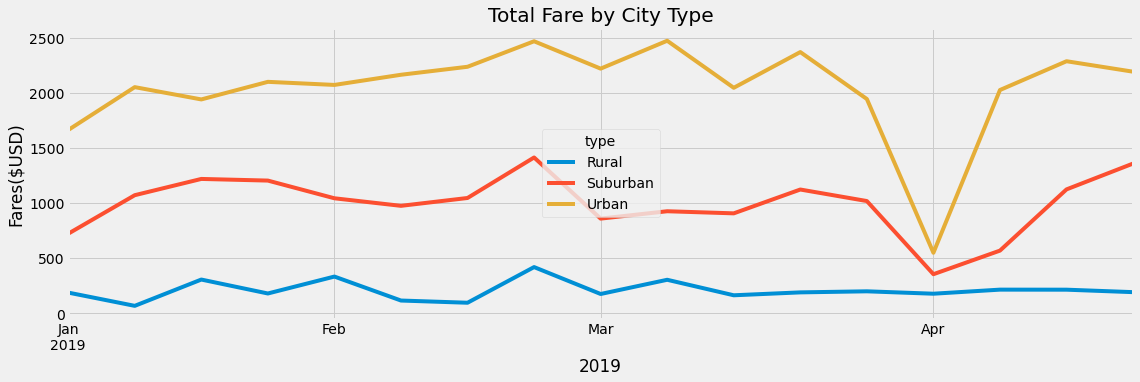

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_rides_pivot = weekly_fares_df
weekly_rides_pivot.plot(figsize = (17,5),
                       title = "Total Fare by City Type",
                       xlabel = "2019",
                       ylabel = "Fares($USD)",
                       legend = True)


plt.show()
